In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')

<h3>Carga de los Datos<h3>

In [3]:
#Receta
#Eliminar Duplicados
#Remover Columnas innecesarias
#Remover Outliers
#Escalar Data
#Reducción de Dimensionalidad

In [4]:
#country
#Name of the country
#child_mort
#Death of children under 5 years of age per 1000 live births
#exports
#Exports of goods and services per capita. Given as %age of the GDP per capita
#health
#Total health spending per capita. Given as %age of GDP per capita
#imports
#Imports of goods and services per capita. Given as %age of the GDP per capita
#Income
#Net income per person
#Inflation
#The measurement of the annual growth rate of the Total GDP
#life_expec
#The average number of years a new born child would live if the current mortality patterns are to rem...
#total_fer
#The number of children that would be born to each woman if the current age-fertility rates remain th...
#gdpp
#The GDP per capita. Calculated as the Total GDP divided by the total population.

In [5]:
df_country = pd.read_csv('./data/country_data.csv')
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
df_country.shape

(167, 10)

In [7]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<h3>Null Values<h3>

In [8]:
df_country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<h3>Duplicates<h3>

In [9]:
df_country.loc[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


<h3>Distibucion<h3>

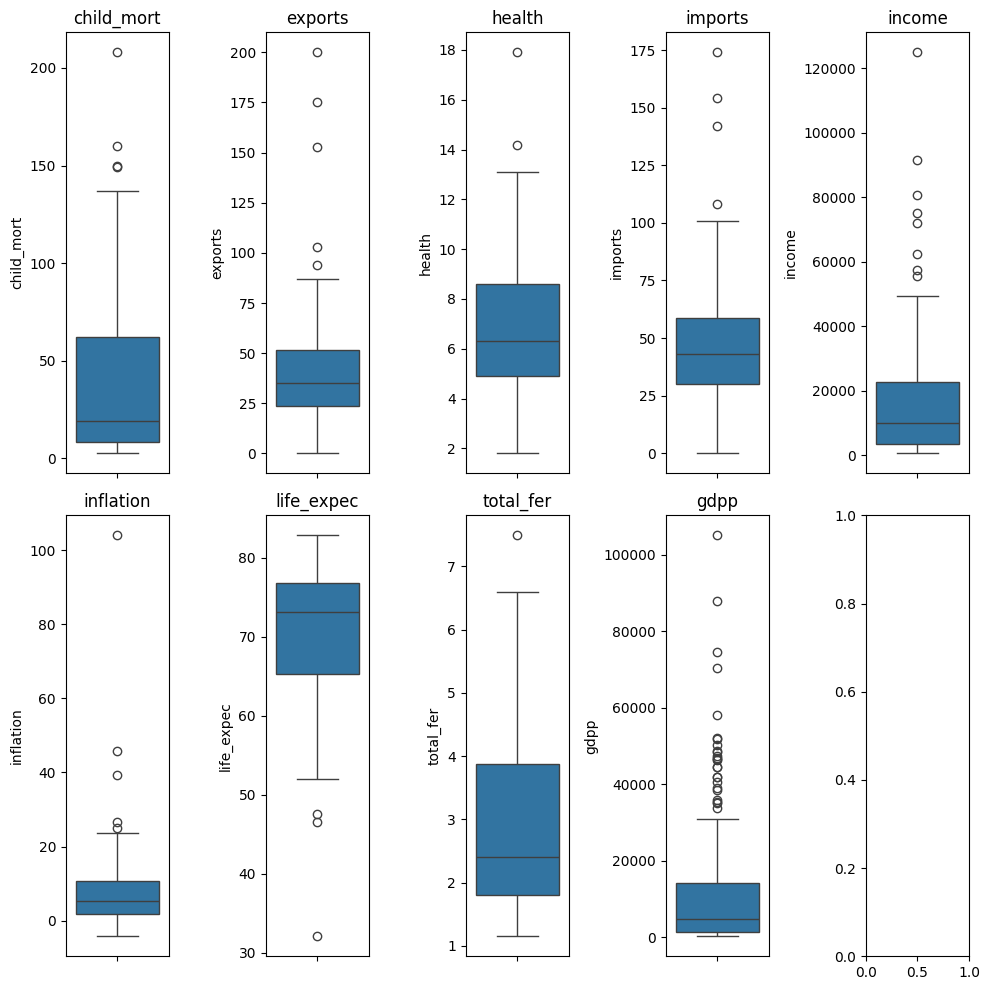

In [10]:
int_cols = df_country.select_dtypes(exclude='object').columns
num_plots = len(int_cols)
rows = 2  # Número de filas deseadas
cols = num_plots // rows + (num_plots % rows > 0)  # Número de columnas deseadas

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))  # Ajusta el tamaño de la figura según tus necesidades

for i, col in enumerate(int_cols):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  # Obtén el eje correspondiente
    sns.boxplot(data=df_country, y=col, ax=ax)
    ax.set_title(col)  # Opcional: establece el título de cada gráfico

plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()

In [11]:
df_country['inflation'].max()

104.0

In [12]:
df_country.loc[df_country['inflation']==df_country['inflation'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


<h3>Correlation<h3>

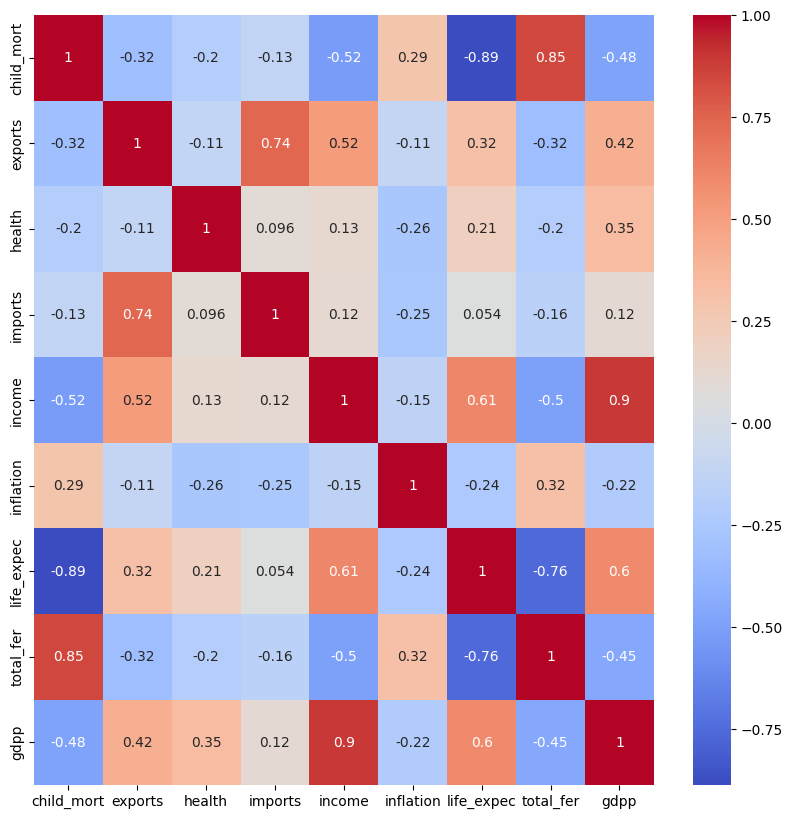

In [13]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_country.drop(columns=['country']).corr(), annot=True, cmap='coolwarm')
plt.show()

<h3>Escalando Datos<h3>

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_country_scaled = scaler.fit_transform(df_country.drop(columns=['country']))
data_country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

<h3>Escalado<h3>

In [15]:
df_country_scaled = pd.DataFrame(data_country_scaled, columns=df_country.drop(columns=['country']).columns)
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


<h3>PCA<h3>

In [16]:
from sklearn.decomposition import PCA

In [17]:
#Ac[a no se ha mencionado el numero de dimensiones a obtener
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [18]:
#Obtener el Indice de Varianza
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Text(0, 0.5, '% Variance')

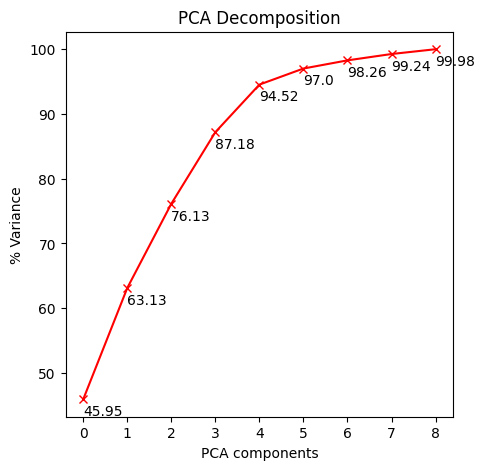

In [19]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
components = list(range(0,9))
plt.figure(figsize=(5,5))
for s,d in zip(components,cum_var):
    plt.annotate(np.round(d,decimals=2), xy=(s,d-2.5))

plt.plot(components,cum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel('PCA components')
plt.ylabel('% Variance')

In [20]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1, inplace=True)

In [21]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


<h3>Librerias<h3>

In [22]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

<h2>KMeans<h2>

In [23]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for cluster in K:
    km = KMeans(n_clusters = cluster)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

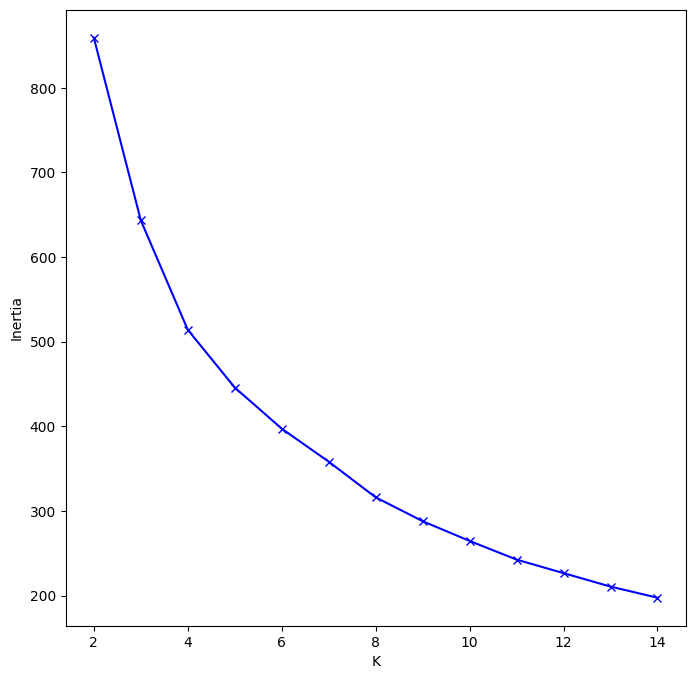

In [24]:
plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

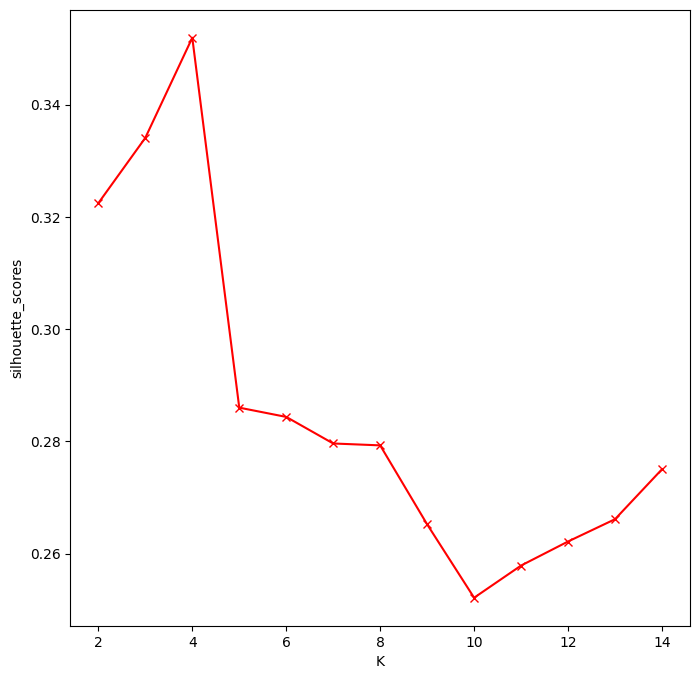

In [25]:
plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette_scores')
plt.show()

In [26]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print('silhouette_score con PCA :')
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca'] = y

silhouette_score con PCA :
0.3549131449906333


In [27]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(df_country_scaled)
print('silhouette_score : sin PCA')
print(silhouette_score(df_country_scaled, y))
df_country['k_means_pca'] = y

silhouette_score : sin PCA
0.3065522876043576


<h2>Agglomerativen hierarchical clustering<h2>

<h3>PCA<h3>

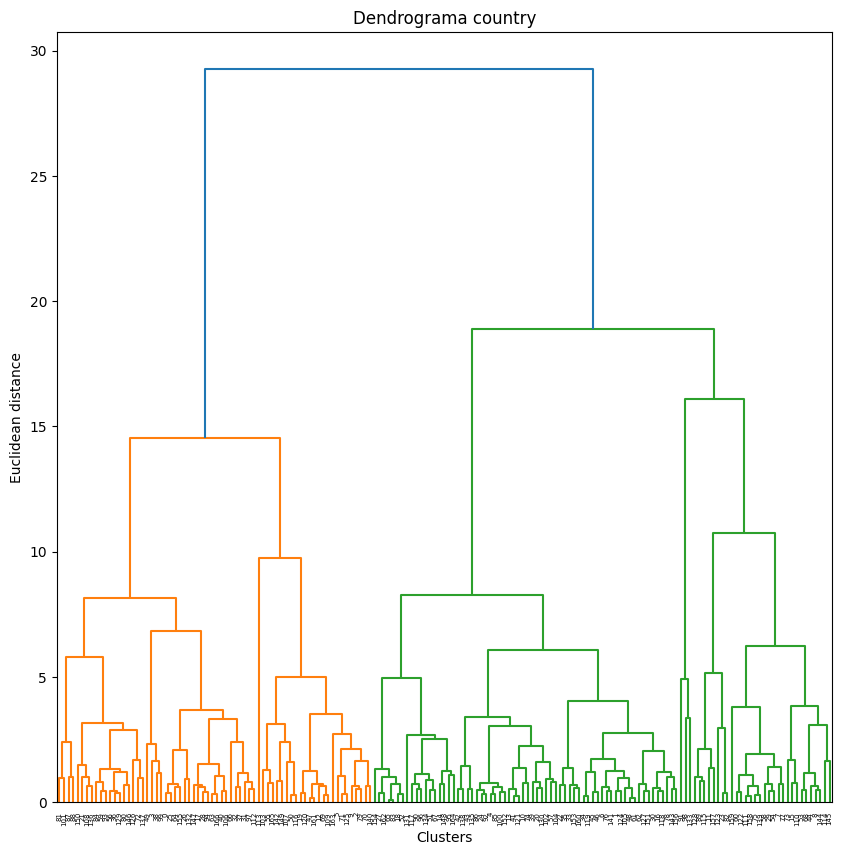

In [28]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [29]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print('silhouette_score con PCA :')
print(silhouette_score(pca_data_standard,y_hc ))
df_country['hc_pca'] = y_hc

silhouette_score con PCA :
0.3070110704080526


<h3>Sin PCA<h3>

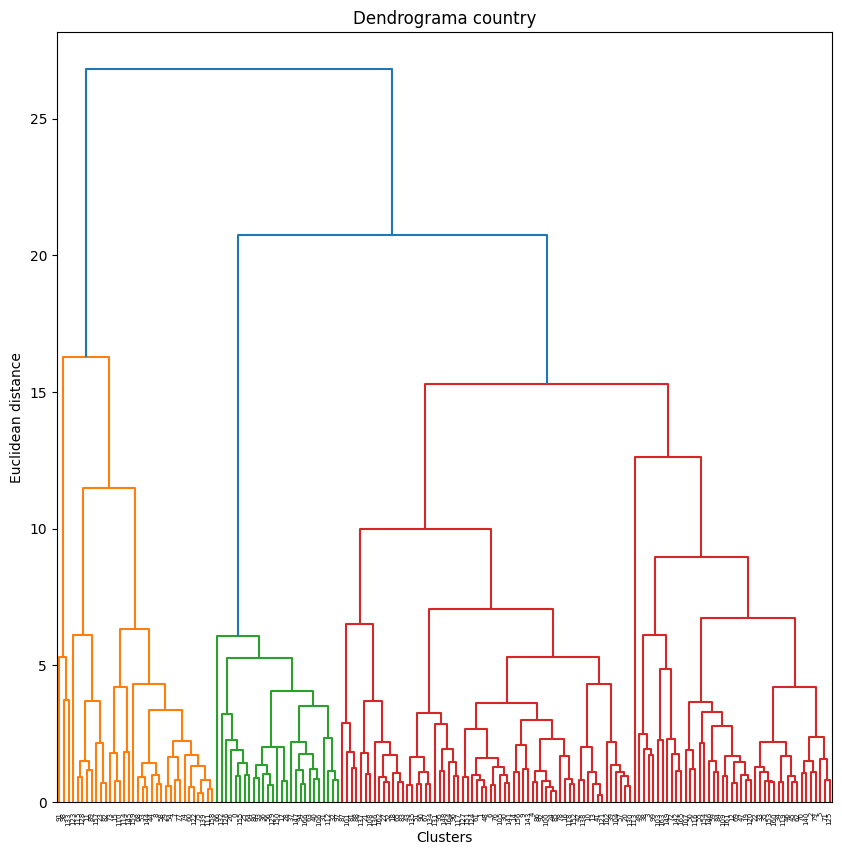

In [30]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [31]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_hc ))
df_country['hc'] = y_hc

0.3153134331018189


<h2>DBSCAN<h2>

<h3>PCA<h3>

In [32]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

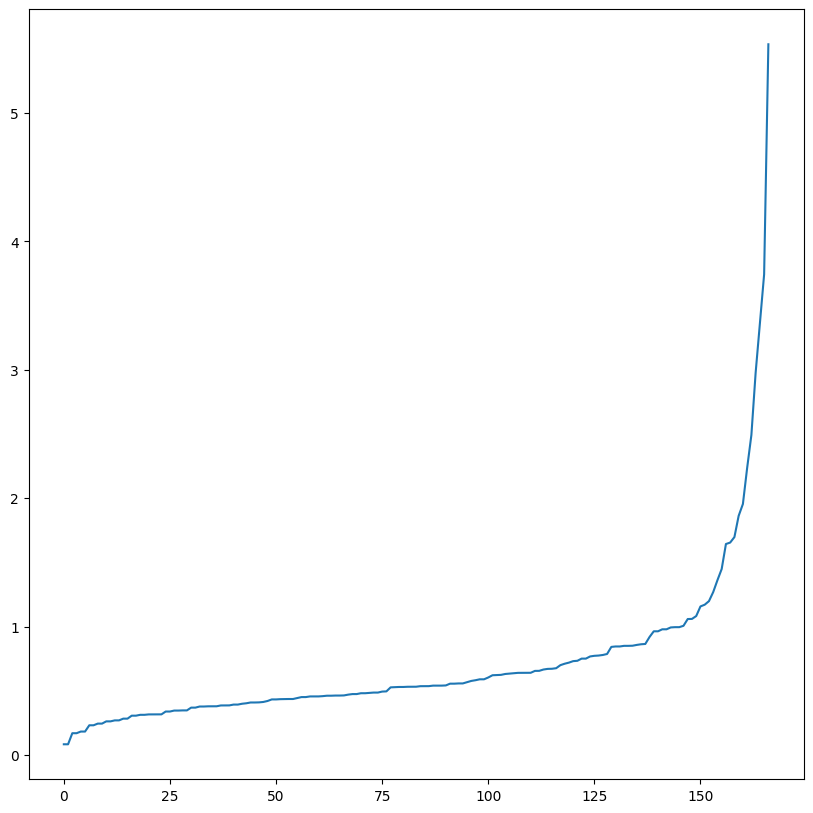

In [33]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [34]:
eps_values = np.arange(0.5, 2.0, 0.10)
min_samples = np.arange(3,12)

In [35]:
from itertools import product 
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [36]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [37]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

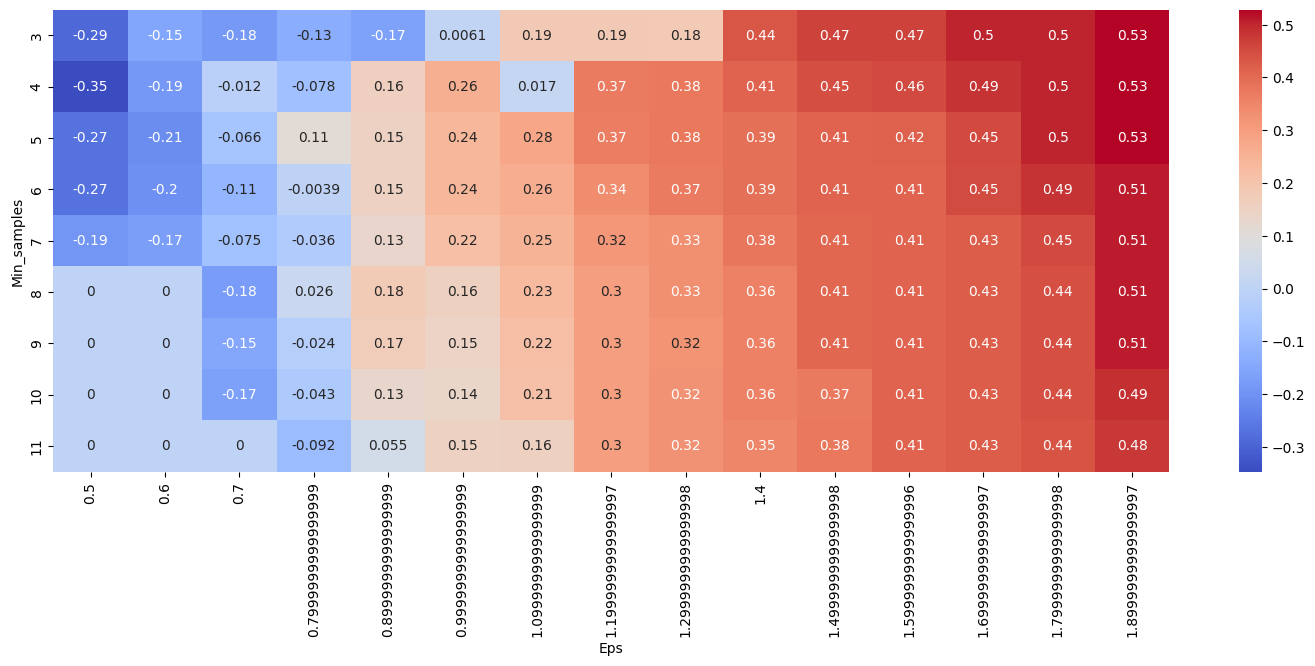

In [38]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

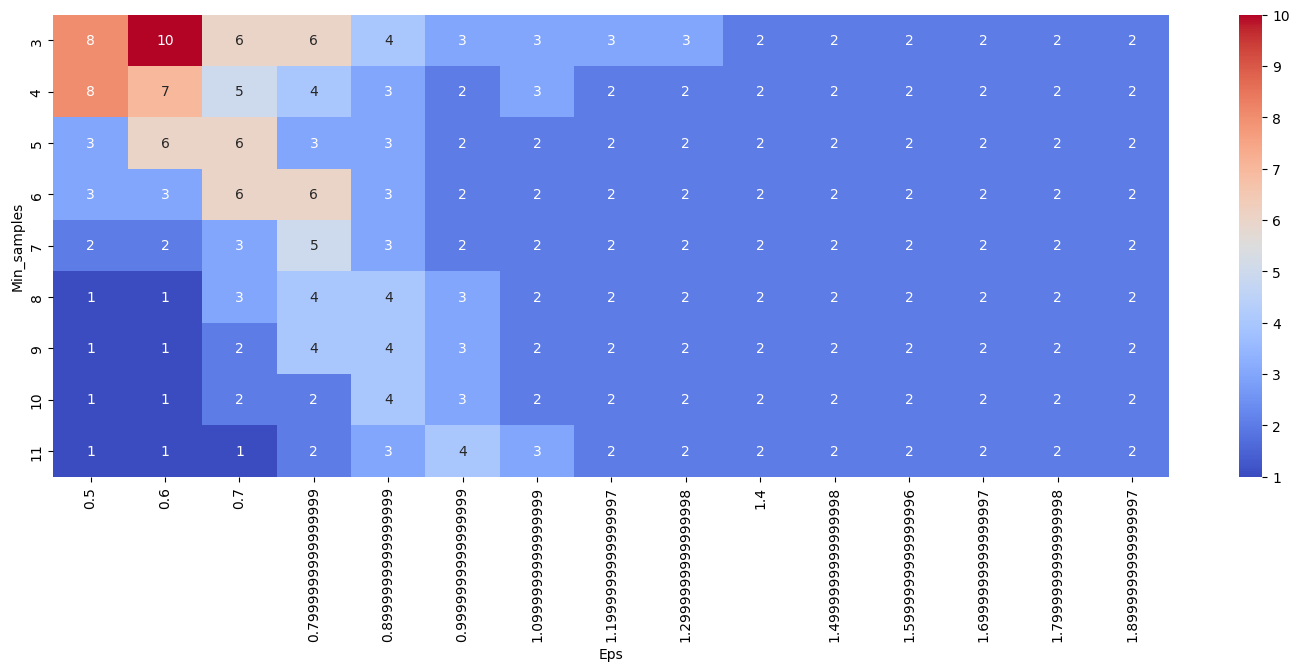

In [40]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

### Sin PCA

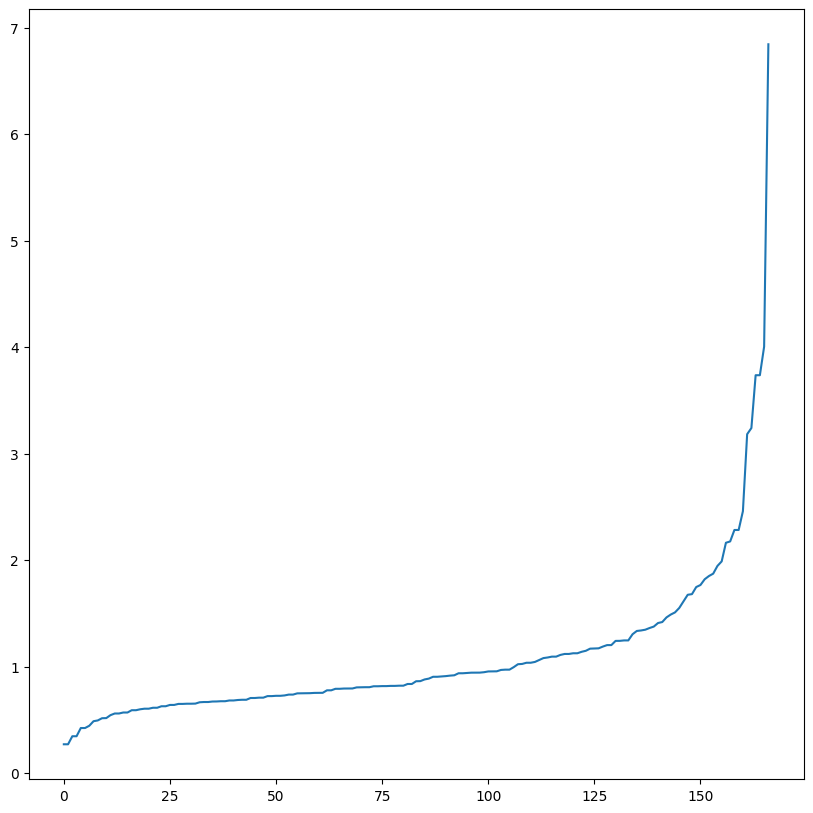

In [41]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [42]:
eps_values = np.arange(1, 3.0, 0.10)
min_samples = np.arange(3,12)

In [43]:
from itertools import product 
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_score.append(silhouette_score(df_country_scaled,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [44]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [45]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

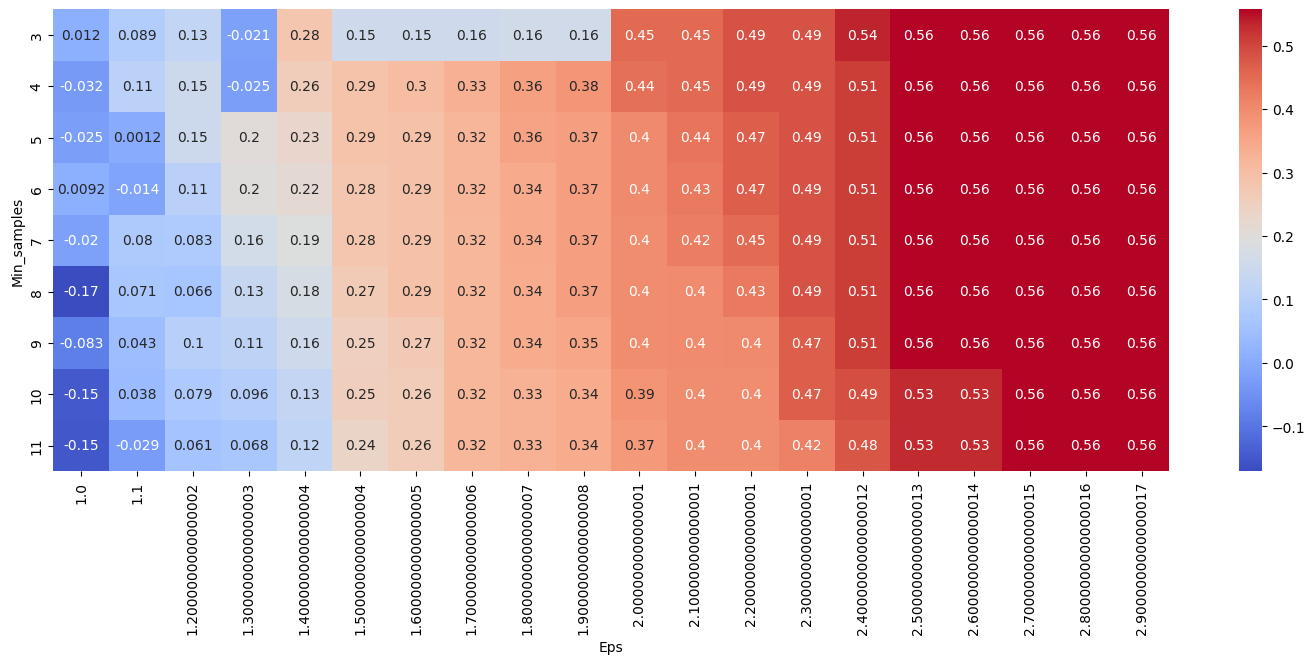

In [46]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

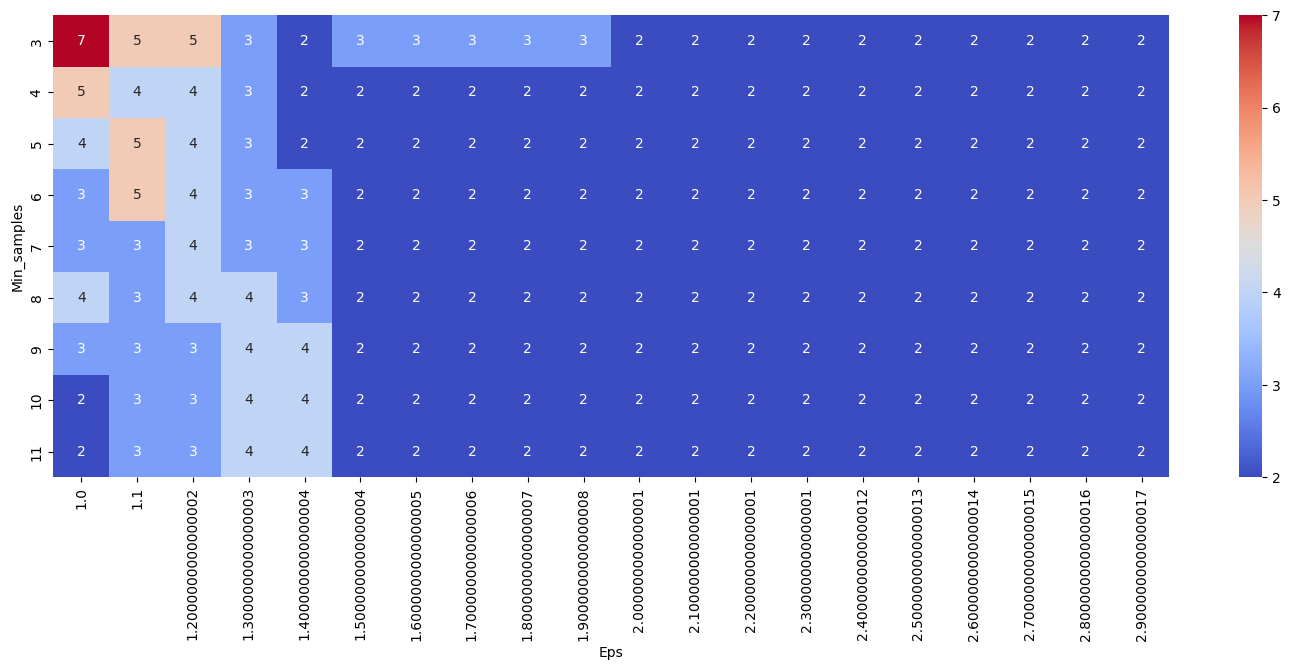

In [47]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [48]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_dbscan ))
df_country['dbscan_cluster'] = y_dbscan

0.1563549566374231


In [49]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,hc_pca,hc,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,1,0,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,1,0,0


In [50]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,hc_pca,hc,dbscan_cluster
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,1.592814,0.407186,0.203593,-0.101796
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,1.098497,0.492788,0.403881,0.357952
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000,0.000000,0.000000,-1.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,0.000000,0.000000,0.000000,0.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,2.000000,0.000000,0.000000,0.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,2.000000,1.000000,0.000000,0.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,4.000000,1.000000,1.000000,1.000000


## Evaluación de resultados

In [51]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca', 'hc_pca',
       'hc', 'dbscan_cluster'],
      dtype='object')

In [52]:
df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


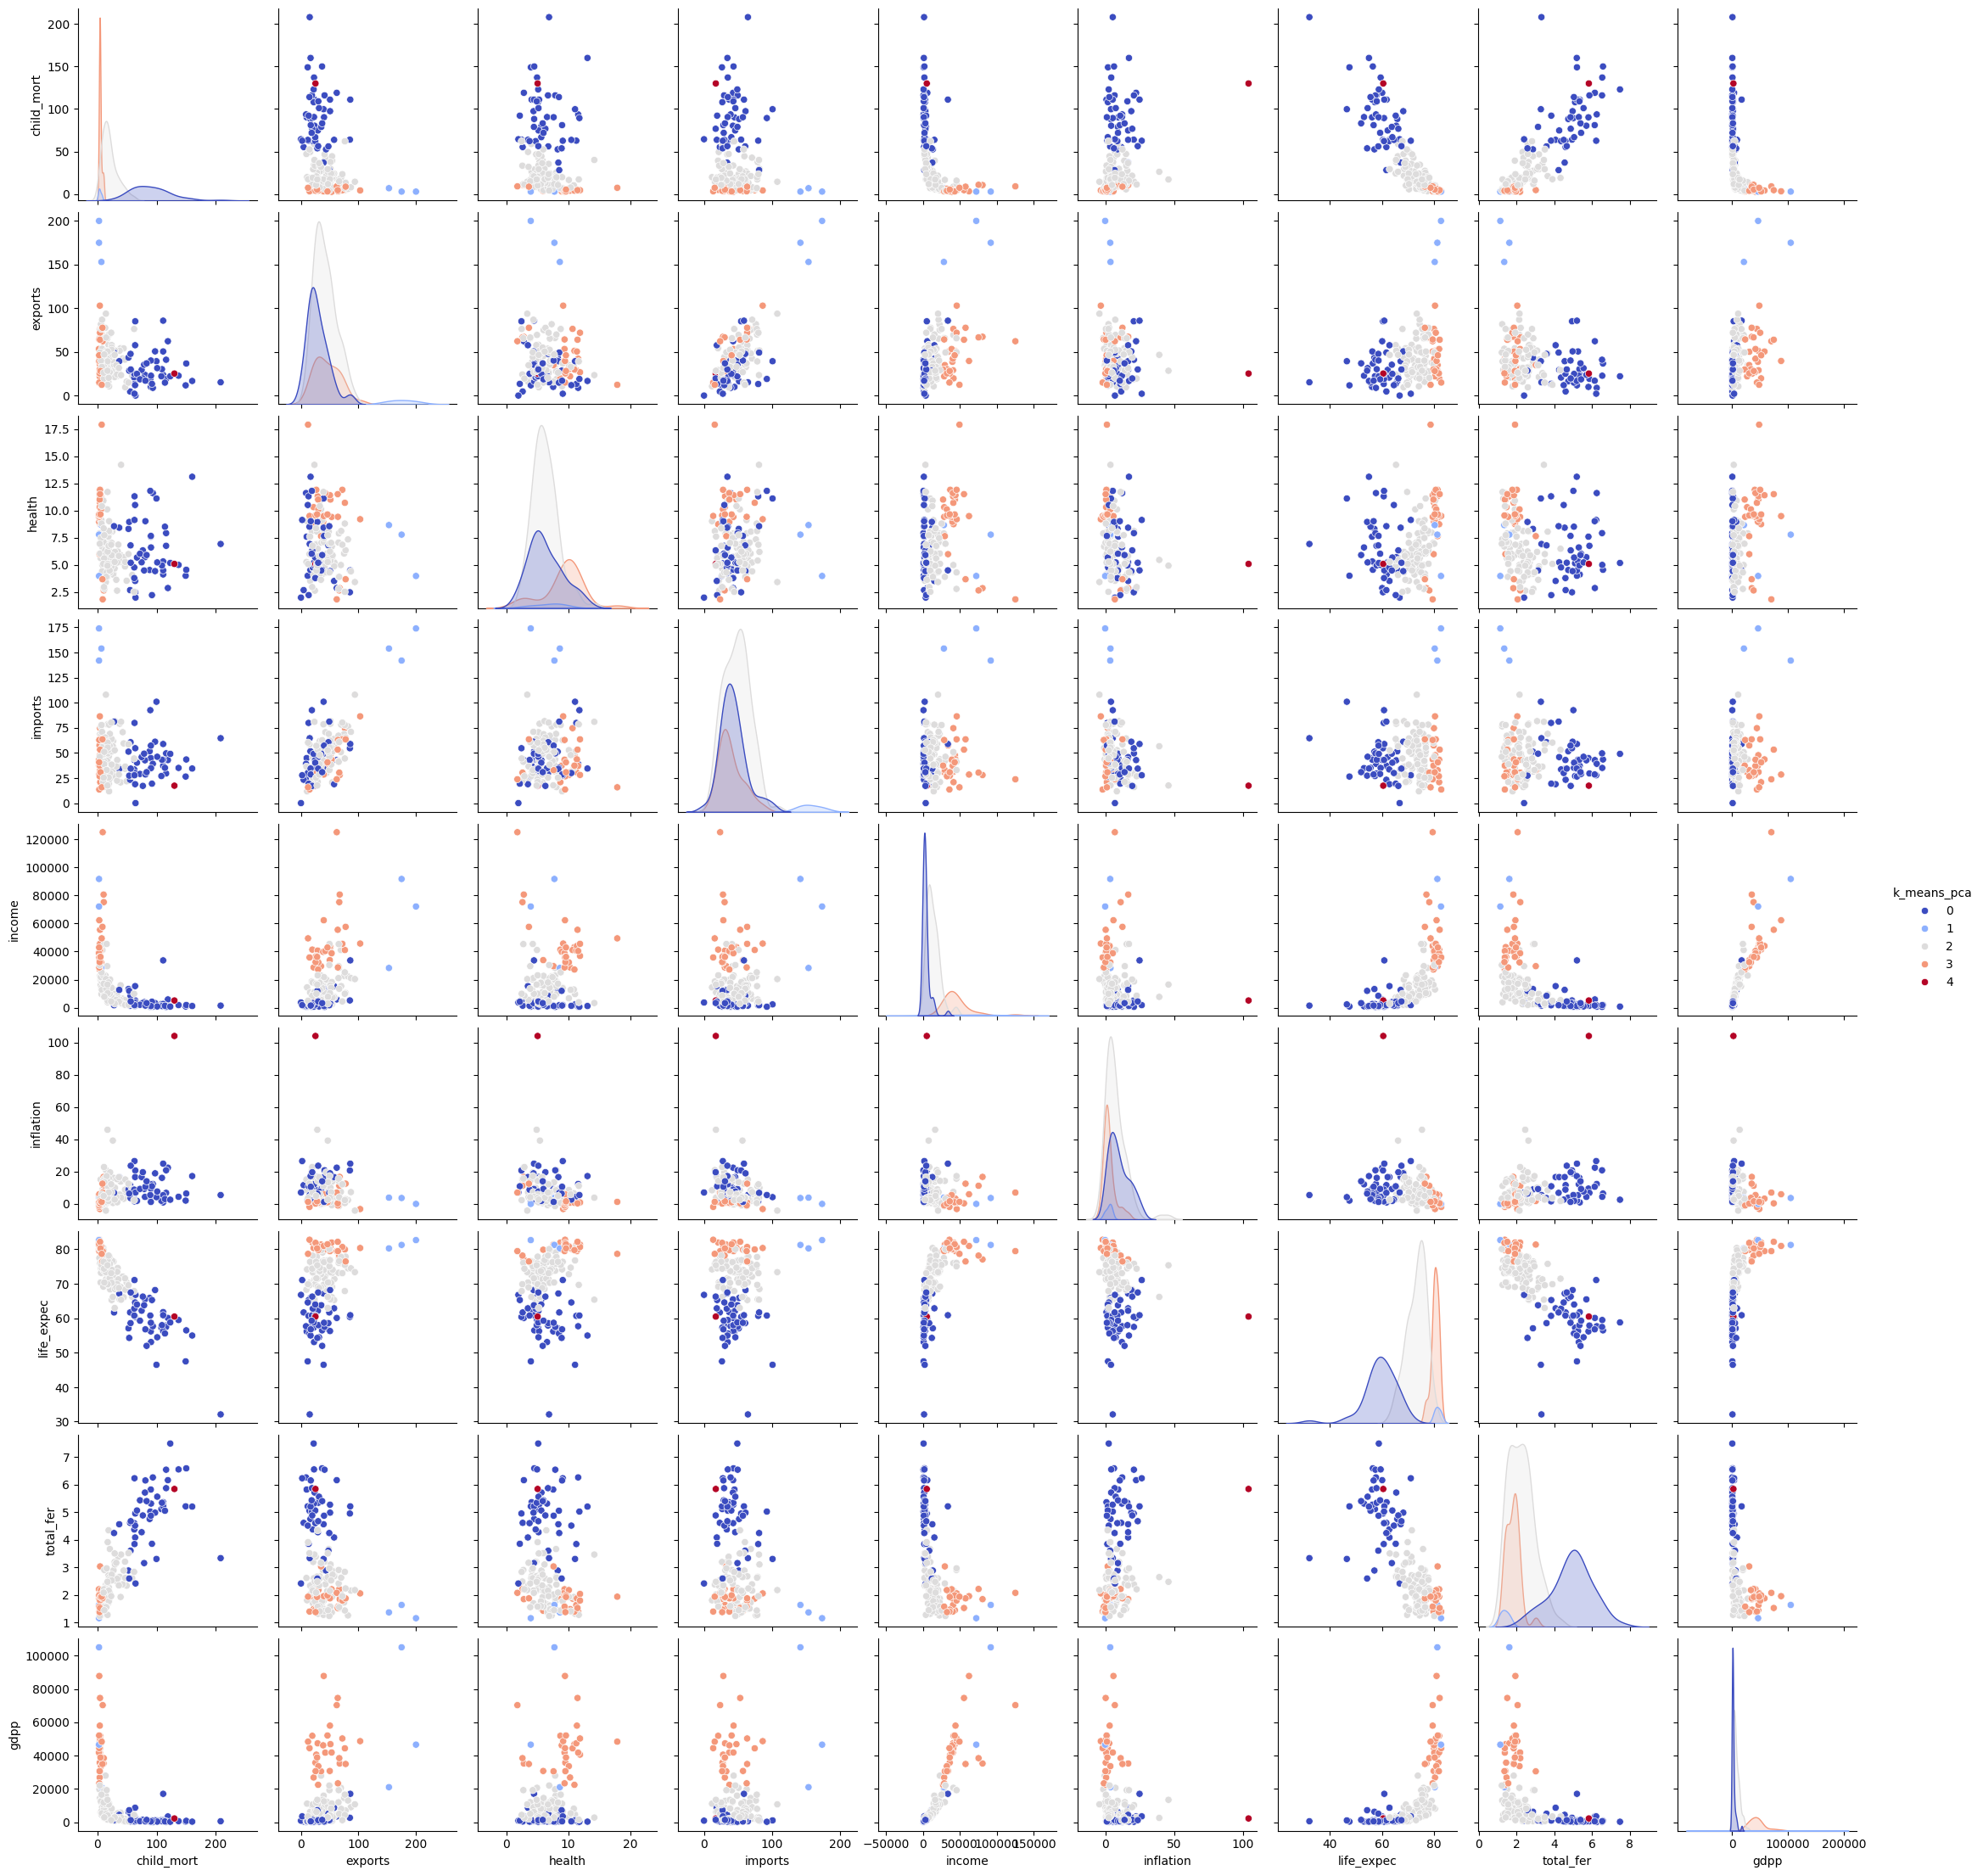

In [53]:
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

In [54]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,hc_pca,hc,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,1,0,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,1,0,0


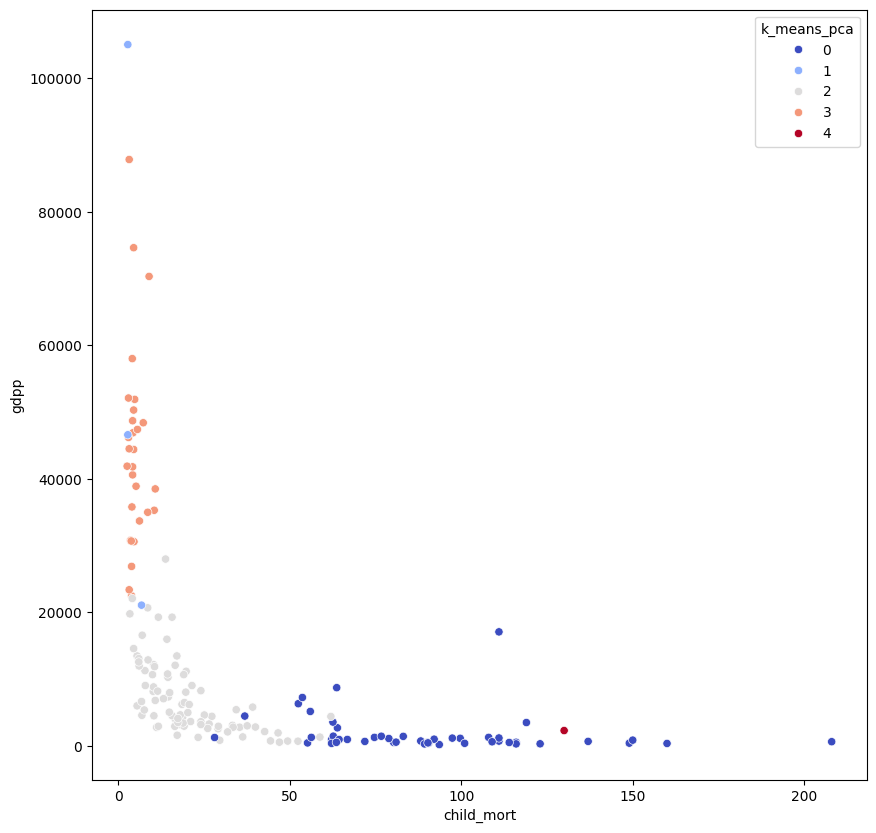

In [55]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country, x='child_mort', y='gdpp',hue='k_means_pca', palette='coolwarm')
plt.show()

In [56]:
df_country[df_country['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,hc_pca,hc,dbscan_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,0,1,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,0,1,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3,0,1,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3,0,1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3,0,1,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3,0,0,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,3,0,1,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3,0,1,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,3,0,1,0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,3,0,1,0
